Connected to venv (Python 3.10.12)

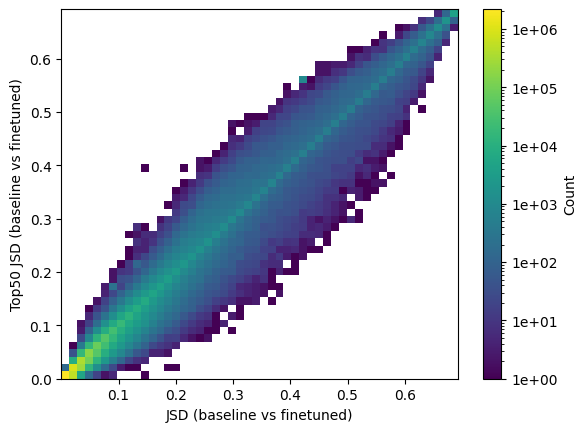

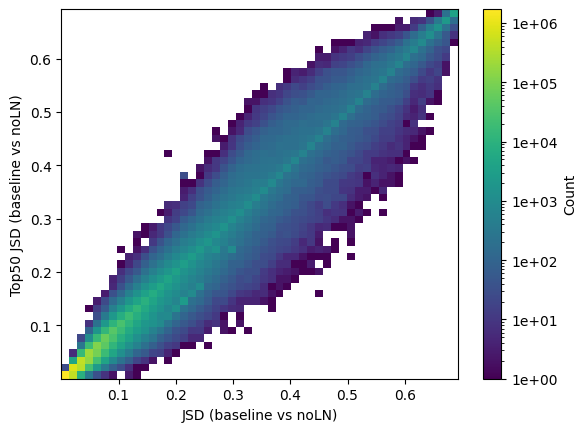

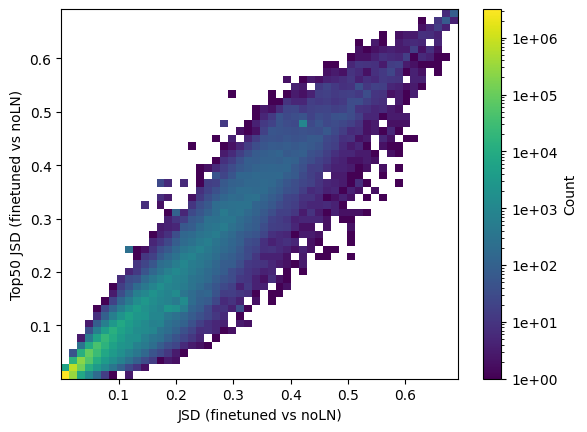

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


n = 512
df = pd.read_parquet(f'/workspace/removing-layer-norm/mech_interp/data/inference_logs/dataset_apollo-pile_samples_10000_seqlen_{n}/inference_results.parquet')
if 'input_sequence_id' not in df.columns:
    df['input_sequence_id'] = df.index//(n-1)


# Baseline vs Finetuned
counts, xedges, yedges, im = plt.hist2d(df['jsd_baseline_vs_finetuned'], df['topk_jsd_baseline_vs_finetuned'], 
                                       bins=50, cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (baseline vs finetuned)')
plt.ylabel('Top50 JSD (baseline vs finetuned)') 
plt.show()

# Baseline vs NoLN
counts, xedges, yedges, im = plt.hist2d(df['jsd_baseline_vs_noLN'], df['topk_jsd_baseline_vs_noLN'],
                                       bins=50, cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (baseline vs noLN)')
plt.ylabel('Top50 JSD (baseline vs noLN)')
plt.show()

# Finetuned vs NoLN 
counts, xedges, yedges, im = plt.hist2d(df['jsd_finetuned_vs_noLN'], df['topk_jsd_finetuned_vs_noLN'],
                                       bins=50, cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (finetuned vs noLN)')
plt.ylabel('Top50 JSD (finetuned vs noLN)')
plt.show()

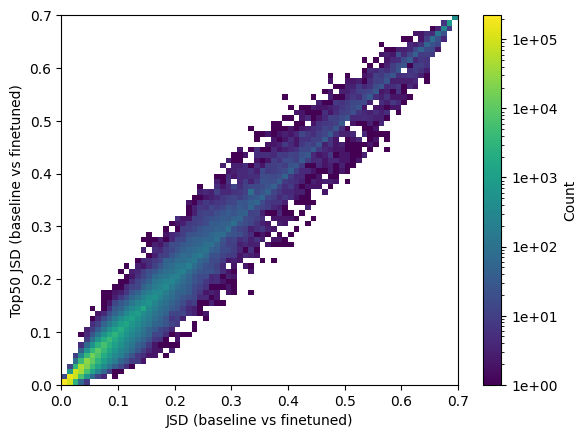

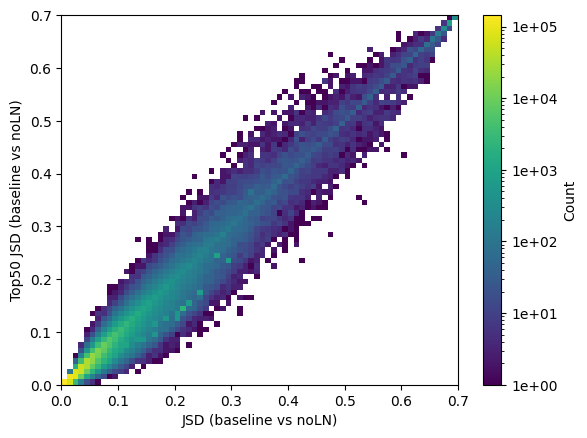

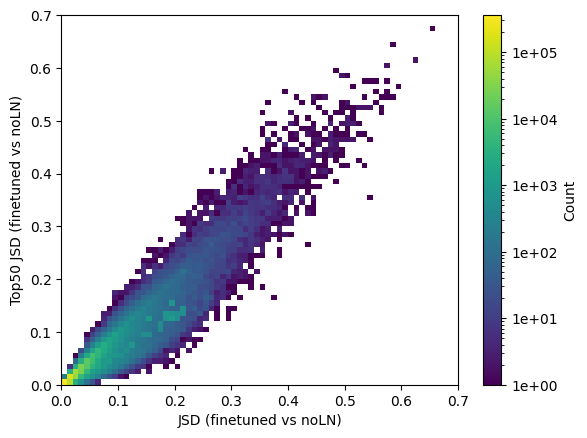

In [21]:
# Baseline vs Finetuned
counts, xedges, yedges, im = plt.hist2d(df_filtered['jsd_baseline_vs_finetuned'], df_filtered['topk_jsd_baseline_vs_finetuned'], 
                                       bins=np.linspace(0, 0.7, 71), cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (baseline vs finetuned)')
plt.ylabel('Top50 JSD (baseline vs finetuned)') 
plt.show()

# Baseline vs NoLN
counts, xedges, yedges, im = plt.hist2d(df_filtered['jsd_baseline_vs_noLN'], df_filtered['topk_jsd_baseline_vs_noLN'],
                                       bins=np.linspace(0, 0.7, 71), cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (baseline vs noLN)')
plt.ylabel('Top50 JSD (baseline vs noLN)')
plt.show()

# Finetuned vs NoLN 
counts, xedges, yedges, im = plt.hist2d(df_filtered['jsd_finetuned_vs_noLN'], df_filtered['topk_jsd_finetuned_vs_noLN'],
                                       bins=np.linspace(0, 0.7, 71), cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (finetuned vs noLN)')
plt.ylabel('Top50 JSD (finetuned vs noLN)')
plt.show()

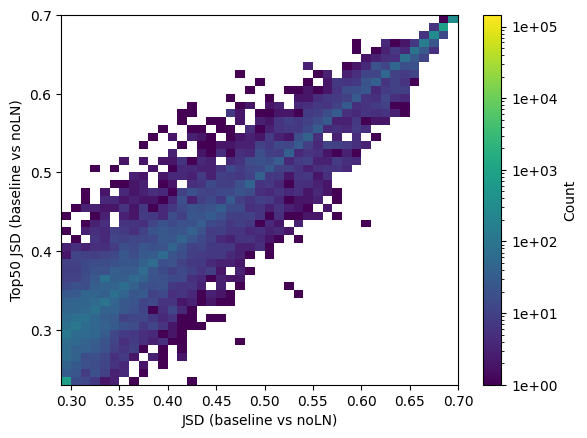

In [55]:
# Baseline vs NoLN
counts, xedges, yedges, im = plt.hist2d(df_filtered['jsd_baseline_vs_noLN'], df_filtered['topk_jsd_baseline_vs_noLN'],
                                       bins=np.linspace(0, 0.7, 71), cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (baseline vs noLN)')
plt.ylabel('Top50 JSD (baseline vs noLN)')
plt.xlim(0.29, None)
plt.ylim(0.23, None)
plt.show()

In [56]:
for i in df_filtered[(df_filtered['jsd_baseline_vs_noLN'] > 0.29) & (df_filtered['jsd_baseline_vs_noLN'] < 0.30) & (df_filtered['topk_jsd_baseline_vs_noLN'] > 0.23) & (df_filtered['topk_jsd_baseline_vs_noLN'] < 0.24)]['full_context']:
    print(i)
    print('-'*100)


[220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220]
----------------------------------------------------------------------------------------------------
[18341   349   494   365 26986   578]
----------------------------------------------------------------------------------------------------
[220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220]
------------------------------------------

In [40]:
for i in df_filtered[(df_filtered['jsd_baseline_vs_noLN'] > 0.22) & (df_filtered['jsd_baseline_vs_noLN'] < 0.23) & (df_filtered['topk_jsd_baseline_vs_noLN'] > 0.15) & (df_filtered['topk_jsd_baseline_vs_noLN'] < 0.16)]['full_context']:
    print(i)
    print('-'*100)



[220 220 220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220 220 220]
----------------------------------------------------------------------------------------------------
[220 220 220 220

In [3]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')
repr(tokenizer.decode([220]))

"' '"

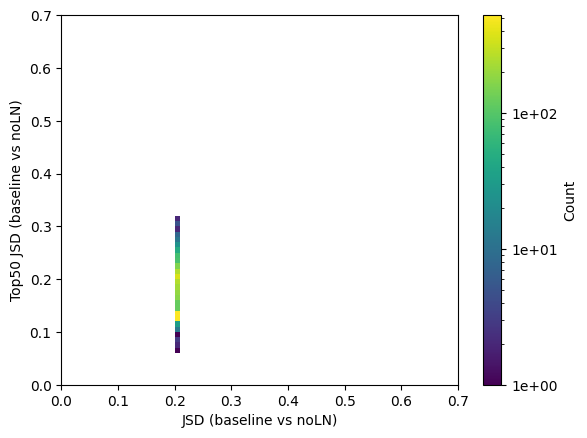

In [12]:

df_odd_jsd = df_filtered[(df_filtered['jsd_baseline_vs_noLN'] > 0.2) & (df_filtered['jsd_baseline_vs_noLN'] < 0.21)]

# Baseline vs NoLN
counts, xedges, yedges, im = plt.hist2d(df_odd_jsd['jsd_baseline_vs_noLN'], df_odd_jsd['topk_jsd_baseline_vs_noLN'],
                                       bins=np.linspace(0, 0.7, 71), cmap='viridis', norm=LogNorm(),)
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (baseline vs noLN)')
plt.ylabel('Top50 JSD (baseline vs noLN)')
plt.show()

# # Finetuned vs NoLN 
# counts, xedges, yedges, im = plt.hist2d(df_filtered['jsd_finetuned_vs_noLN'], df_filtered['topk_jsd_finetuned_vs_noLN'],
#                                        bins=50, cmap='viridis', norm=LogNorm())
# plt.colorbar(im, label='Count', format='%.0e')
# plt.xlabel('JSD (finetuned vs noLN)')
# plt.ylabel('Top50 JSD (finetuned vs noLN)')
# plt.show()

In [ ]:
plot_ce_hist2d_comparison(df, max_ce=90)
plot_ce_hist2d_comparison(df_filtered, max_ce=90)
plot_ce_hist2d_comparison(df_LN_specific_diff, max_ce=90)
plot_ce_hist2d_comparison(df_superfiltered, max_ce=20)

NameError: name 'plot_ce_hist2d_comparison' is not defined

In [68]:
# Token IDs for special characters: [('\r', 201), ('\t', 197), ('\x0c', 200), ('\n', 198), ('\n\n', 628)
df_filtered = df[~df['following_token'].isin([201, 197, 200])]
df_filtered = df_filtered[~df_filtered['last_token'].isin([198, 628])]
df_filtered = df_filtered[(df_filtered['context_length'] >1)]
df_filtered = df_filtered[df_filtered['input_sequence_id'] != 3784]
df_filtered = df_filtered[df_filtered['input_sequence_id'] != 6634]
df_filtered = df_filtered[df_filtered['input_sequence_id'] != 8859]
# galvin's area
df_LN_specific_diff = df_filtered[(df_filtered['jsd_baseline_vs_finetuned'] < 0.05) & (df_filtered['jsd_baseline_vs_noLN'] > 0.3)] 
# luca's area
df_superfiltered = df_LN_specific_diff[(df_LN_specific_diff['ce_finetuned'] < 1) & (df_LN_specific_diff['ce_noLN'] > 2.5)]

In [ ]:
plot_ce_hist2d_comparison(df, max_ce=90)
plot_ce_hist2d_comparison(df_filtered, max_ce=90)
plot_ce_hist2d_comparison(df_LN_specific_diff, max_ce=90)
plot_ce_hist2d_comparison(df_superfiltered, max_ce=20)

NameError: name 'plot_ce_hist2d_comparison' is not defined

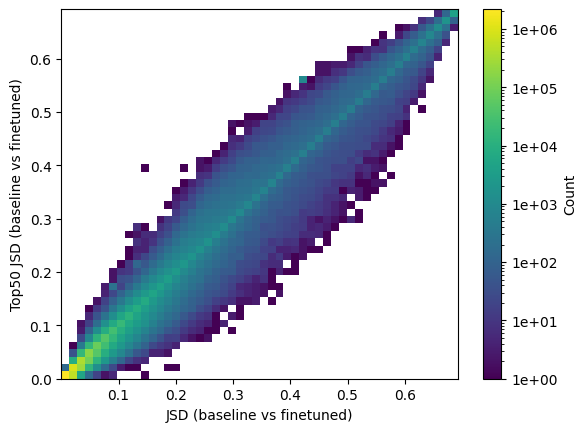

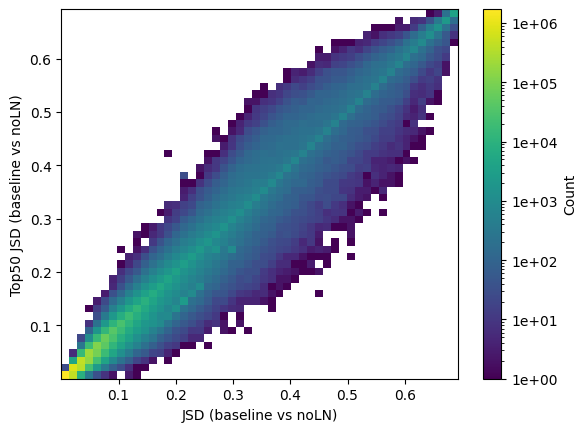

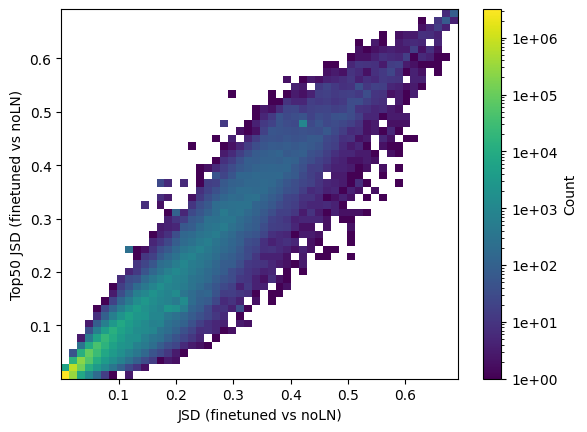

In [ ]:
# Baseline vs Finetuned
counts, xedges, yedges, im = plt.hist2d(df['jsd_baseline_vs_finetuned'], df['topk_jsd_baseline_vs_finetuned'], 
                                       bins=50, cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (baseline vs finetuned)')
plt.ylabel('Top50 JSD (baseline vs finetuned)') 
plt.show()

# Baseline vs NoLN
counts, xedges, yedges, im = plt.hist2d(df['jsd_baseline_vs_noLN'], df['topk_jsd_baseline_vs_noLN'],
                                       bins=50, cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (baseline vs noLN)')
plt.ylabel('Top50 JSD (baseline vs noLN)')
plt.show()

# Finetuned vs NoLN 
counts, xedges, yedges, im = plt.hist2d(df['jsd_finetuned_vs_noLN'], df['topk_jsd_finetuned_vs_noLN'],
                                       bins=50, cmap='viridis', norm=LogNorm())
plt.colorbar(im, label='Count', format='%.0e')
plt.xlabel('JSD (finetuned vs noLN)')
plt.ylabel('Top50 JSD (finetuned vs noLN)')
plt.show()

In [46]:
def plot_ce_distribution(df, bins = np.arange(0, 90, 1), log_scale = True):
    plt.hist(df['ce_baseline'], bins=bins, histtype='step', label='baseline')
    plt.hist(df['ce_finetuned'], bins=bins, histtype='step', label='finetuned')
    plt.hist(df['ce_noLN'], bins=bins, histtype='step', label='noLN')
    plt.legend()
    if log_scale:
        plt.yscale('log')
    plt.title('CE Loss Distribution')
    plt.xlabel('CE Loss')
    plt.ylabel('Frequency')
    plt.show()

def plot_jsd_distribution(df, bins = np.arange(0, 1, 0.01), log_scale = True):
    plt.hist(df['jsd_baseline_vs_finetuned'], bins=bins, histtype='step', label='baseline vs finetuned')
    plt.hist(df['jsd_baseline_vs_noLN'], bins=bins, histtype='step', label='baseline vs noLN')
    plt.hist(df['jsd_finetuned_vs_noLN'], bins=bins, histtype='step', label='finetuned vs noLN')
    plt.legend()
    if log_scale:
        plt.yscale('log')
    plt.title('JSD Distribution')
    plt.xlabel('JSD')
    plt.ylabel('Frequency')
    plt.show()

def plot_ce_diff_distribution(df, bins = np.arange(-90, 90, 1), log_scale = True):
    plt.hist(df['ce_diff_baseline_vs_finetuned'], bins=bins, histtype='step', label='baseline vs finetuned')
    plt.hist(df['ce_diff_baseline_vs_noLN'], bins=bins, histtype='step', label='baseline vs noLN')
    plt.hist(df['ce_diff_finetuned_vs_noLN'], bins=bins, histtype='step', label='finetuned vs noLN')
    plt.legend()
    if log_scale:
        plt.yscale('log')
    plt.title('CE Loss Difference Distribution')
    plt.xlabel('CE Loss Difference')
    plt.ylabel('Frequency')
    plt.show()


def plot_ce_hist2d_comparison(df, max_ce=90, bins=100, cmap='viridis'):
    """
    Create 2D histogram plots comparing CE losses between models.
    
    Args:
        df: DataFrame containing CE loss columns
        max_ce: Maximum CE value to display on axes
        bins: Number of bins for the histogram (or tuple for different x/y bins)
        cmap: Colormap to use for the histogram
    """
    # Find max value across all CE columns if not specified
    if max_ce is None:
        max_ce = max(df['ce_baseline'].max(), df['ce_finetuned'].max(), df['ce_noLN'].max())
    
    # Create figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Baseline vs Finetuned
    h1 = ax1.hist2d(df['ce_baseline'], df['ce_finetuned'], 
                   bins=bins, range=[[0, max_ce], [0, max_ce]], 
                   cmap=cmap, norm=plt.cm.colors.LogNorm())
    fig.colorbar(h1[3], ax=ax1, label='Frequency')
    ax1.set_xlabel('Baseline CE')
    ax1.set_ylabel('Finetuned CE')
    ax1.set_aspect('equal')
    ax1.set_title('CE Loss: Baseline vs Finetuned')
    
    # Plot 2: Baseline vs NoLN
    h2 = ax2.hist2d(df['ce_baseline'], df['ce_noLN'], 
                   bins=bins, range=[[0, max_ce], [0, max_ce]], 
                   cmap=cmap, norm=plt.cm.colors.LogNorm())
    fig.colorbar(h2[3], ax=ax2, label='Frequency')
    ax2.set_xlabel('Baseline CE')
    ax2.set_ylabel('NoLN CE')
    ax2.set_aspect('equal')
    ax2.set_title('CE Loss: Baseline vs NoLN')
    
    # Plot 3: Finetuned vs NoLN
    h3 = ax3.hist2d(df['ce_finetuned'], df['ce_noLN'], 
                   bins=bins, range=[[0, max_ce], [0, max_ce]], 
                   cmap=cmap, norm=plt.cm.colors.LogNorm())
    fig.colorbar(h3[3], ax=ax3, label='Frequency')
    ax3.set_xlabel('Finetuned CE')
    ax3.set_ylabel('NoLN CE')
    ax3.set_aspect('equal')
    ax3.set_title('CE Loss: Finetuned vs NoLN')
    
    # Add diagonal reference line to each plot
    for ax in [ax1, ax2, ax3]:
        ax.plot([0, max_ce], [0, max_ce], 'k--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    return fig, (ax1, ax2, ax3)

def plot_ce_scatter_comparison(df, max_ce = 90):
    # Find max value across all CE columns
    if max_ce is None:
        max_ce = max(df['ce_baseline'].max(), df['ce_finetuned'].max(), df['ce_noLN'].max())
    
    # Create figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Baseline vs Finetuned, colored by NoLN
    scatter1 = ax1.scatter(df['ce_baseline'], df['ce_finetuned'], c=df['ce_noLN'],
                          cmap='viridis', alpha=0.5, s=1)
    fig.colorbar(scatter1, ax=ax1, label='NoLN CE')
    ax1.set_xlabel('Baseline CE')
    ax1.set_ylabel('Finetuned CE')
    ax1.set_xlim(0, max_ce)
    ax1.set_ylim(0, max_ce)
    ax1.set_aspect('equal')
    ax1.set_title('CE Loss: Baseline vs Finetuned')

    # Plot 2: Baseline vs NoLN, colored by Finetuned
    scatter2 = ax2.scatter(df['ce_baseline'], df['ce_noLN'], c=df['ce_finetuned'],
                          cmap='viridis', alpha=0.5, s=1)
    fig.colorbar(scatter2, ax=ax2, label='Finetuned CE')
    ax2.set_xlabel('Baseline CE')
    ax2.set_ylabel('NoLN CE')
    ax2.set_xlim(0, max_ce)
    ax2.set_ylim(0, max_ce)
    ax2.set_aspect('equal')
    ax2.set_title('CE Loss: Baseline vs NoLN')

    # Plot 3: Finetuned vs NoLN, colored by Baseline
    scatter3 = ax3.scatter(df['ce_finetuned'], df['ce_noLN'], c=df['ce_baseline'],
                          cmap='viridis', alpha=0.5, s=1)
    fig.colorbar(scatter3, ax=ax3, label='Baseline CE')
    ax3.set_xlabel('Finetuned CE')
    ax3.set_ylabel('NoLN CE')
    ax3.set_xlim(0, max_ce)
    ax3.set_ylim(0, max_ce)
    ax3.set_aspect('equal')
    ax3.set_title('CE Loss: Finetuned vs NoLN')

    plt.tight_layout()
    plt.show()

def plot_jsd_scatter_comparison(df, max_jsd = 1.0):
    # Find max value across all JSD columns if not specified
    if max_jsd is None:
        max_jsd = max(df['jsd_baseline_vs_finetuned'].max(), 
                     df['jsd_baseline_vs_noLN'].max(), 
                     df['jsd_finetuned_vs_noLN'].max())
    
    # Create figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Baseline vs Finetuned, colored by NoLN
    scatter1 = ax1.scatter(df['jsd_baseline_vs_finetuned'], df['jsd_baseline_vs_noLN'], 
                          c=df['jsd_finetuned_vs_noLN'],
                          cmap='viridis', alpha=0.5, s=1)
    fig.colorbar(scatter1, ax=ax1, label='Finetuned vs NoLN JSD')
    ax1.set_xlabel('Baseline vs Finetuned JSD')
    ax1.set_ylabel('Baseline vs NoLN JSD')
    ax1.set_xlim(0, max_jsd)
    ax1.set_ylim(0, max_jsd)
    ax1.set_aspect('equal')
    ax1.set_title('JSD: Baseline vs Finetuned/NoLN')

    # Plot 2: Baseline vs NoLN, colored by Finetuned
    scatter2 = ax2.scatter(df['jsd_baseline_vs_noLN'], df['jsd_finetuned_vs_noLN'], 
                          c=df['jsd_baseline_vs_finetuned'],
                          cmap='viridis', alpha=0.5, s=1)
    fig.colorbar(scatter2, ax=ax2, label='Baseline vs Finetuned JSD')
    ax2.set_xlabel('Baseline vs NoLN JSD')
    ax2.set_ylabel('Finetuned vs NoLN JSD')
    ax2.set_xlim(0, max_jsd)
    ax2.set_ylim(0, max_jsd)
    ax2.set_aspect('equal')
    ax2.set_title('JSD: NoLN Comparisons')

    # Plot 3: Finetuned vs NoLN, colored by Baseline
    scatter3 = ax3.scatter(df['jsd_finetuned_vs_noLN'], df['jsd_baseline_vs_finetuned'], 
                          c=df['jsd_baseline_vs_noLN'],
                          cmap='viridis', alpha=0.5, s=1)
    fig.colorbar(scatter3, ax=ax3, label='Baseline vs NoLN JSD')
    ax3.set_xlabel('Finetuned vs NoLN JSD')
    ax3.set_ylabel('Baseline vs Finetuned JSD')
    ax3.set_xlim(0, max_jsd)
    ax3.set_ylim(0, max_jsd)
    ax3.set_aspect('equal')
    ax3.set_title('JSD: Model Comparisons')

    plt.tight_layout()
    plt.show()

In [12]:
from load_dataset import DataManager

dataloader = DataManager('apollo-pile', batch_size=1, max_context=1024, num_samples=10000).create_dataloader()


Resolving data files:   0%|          | 0/393 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/393 [00:00<?, ?it/s]

In [13]:
count = 0
ids = []
from tqdm import tqdm
for seq_id, sequence in tqdm(enumerate(dataloader)):
    sequence = sequence.squeeze(0)
    if 201 in sequence or 197 in sequence or 200 in sequence or 628 in sequence:
        count += 1
        ids.append(seq_id)
print(count)
print(ids)

10000it [00:19, 524.98it/s]

3414


In [ ]:
df 

In [102]:
df_max_len = df[df['context_length'] == 511]
df_filtered_context = df_max_len[~df_max_len['full_context'].apply(lambda x: any(token_id in x for token_id in [201, 197, 200, 628]))]
df_filtered_context['sequence_idx']

df_filtered_context = df[df['sequence_idx'].isin(df_filtered_context['sequence_idx'])]

df_filtered_context = df_filtered_context[(df_filtered_context['context_length'] >1)]
df_filtered_context = df_filtered_context[df_filtered_context['input_sequence_id'] != 3784]
df_filtered_context = df_filtered_context[df_filtered_context['input_sequence_id'] != 6634]
df_filtered_context = df_filtered_context[df_filtered_context['input_sequence_id'] != 8859]

# galvin's area
df_galvins_area = df_filtered_context[(df_filtered_context['jsd_baseline_vs_finetuned'] < 0.05) & (df_filtered_context['jsd_baseline_vs_noLN'] > 0.3)] 
# luca's area
df_lucas_area = df_galvins_area[(df_galvins_area['ce_finetuned'] < 1)]



In [ ]:
plt.ss

In [ ]:
df_filtered_context['sequence_idx']

7419

In [ ]:
plot_ce_

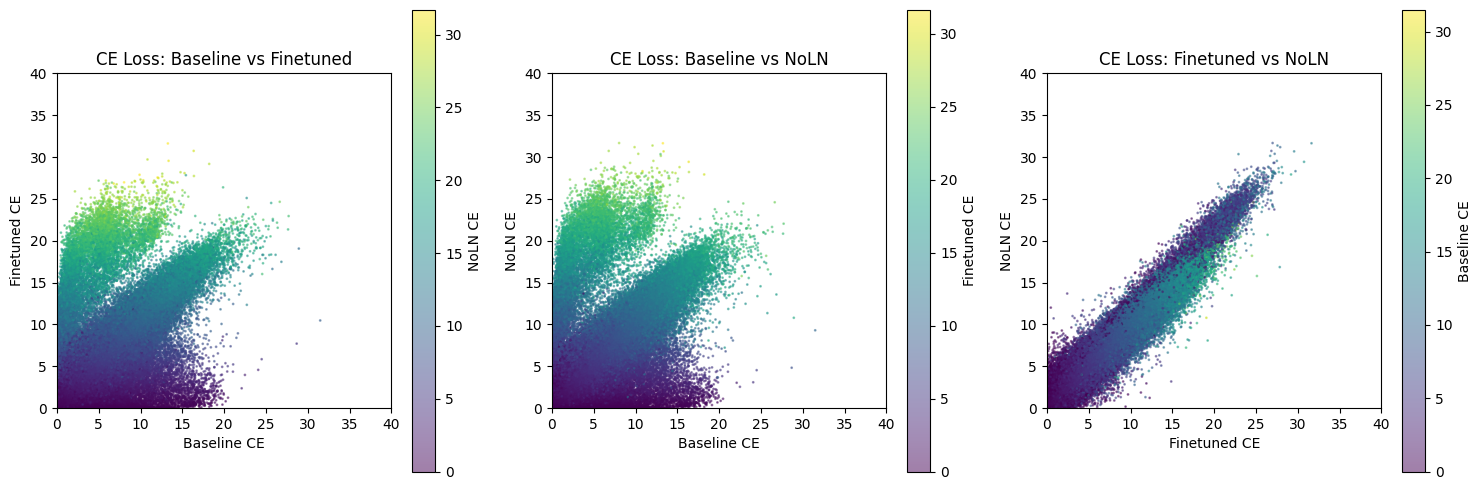

In [72]:
plot_ce_scatter_comparison(df_filtered, max_ce=40)

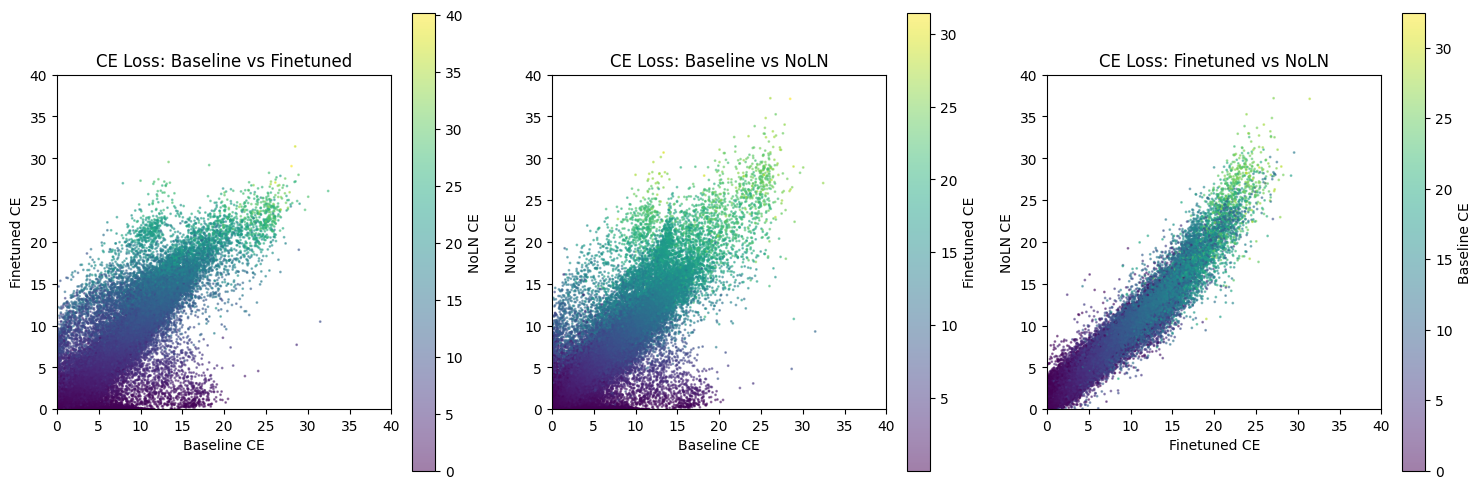

In [73]:
plot_ce_scatter_comparison(df_filtered_context, max_ce=40)


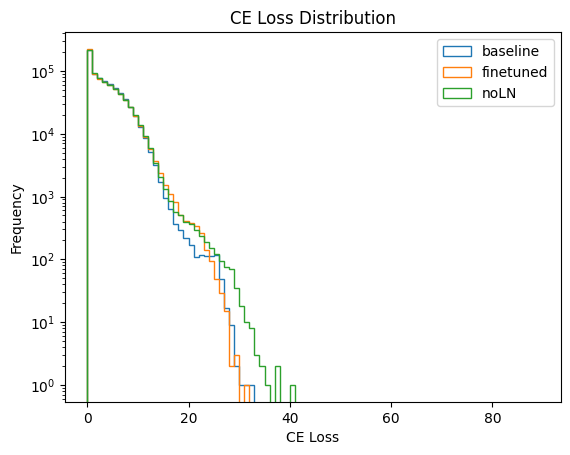

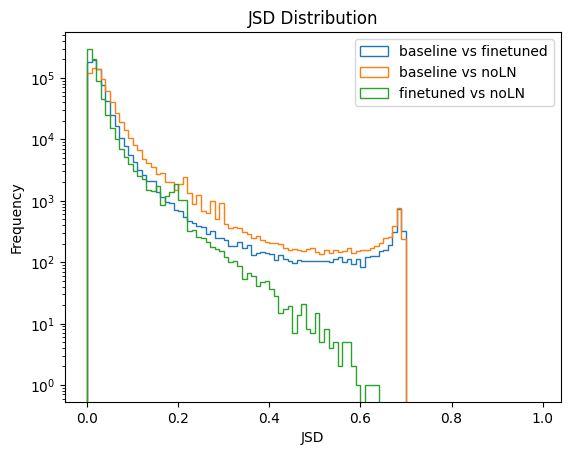

In [76]:
plot_ce_distribution(df_filtered_context)
plot_jsd_distribution(df_filtered_context)

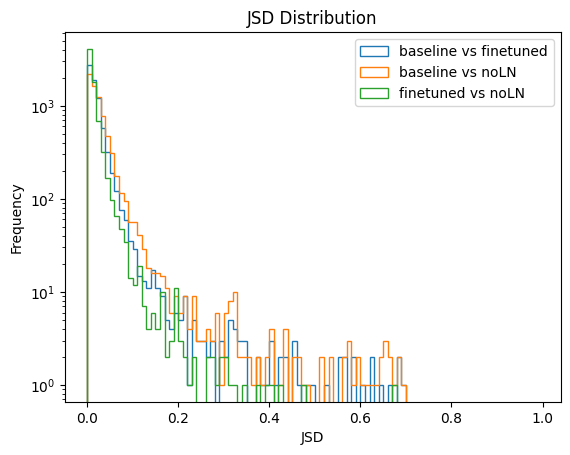

In [58]:
plot_jsd_distribution(df_filtered_context)

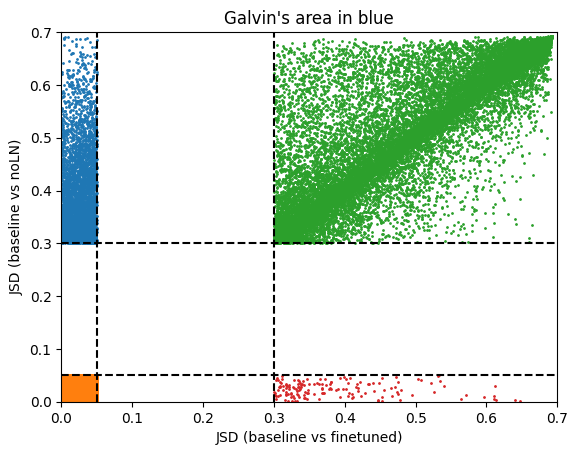

In [103]:
plt.scatter(df_galvins_area['jsd_baseline_vs_finetuned'], df_galvins_area['jsd_baseline_vs_noLN'], s=1)


df_no_diff_area = df_filtered_context[(df_filtered_context['jsd_baseline_vs_finetuned'] < 0.05) & (df_filtered_context['jsd_baseline_vs_noLN'] < 0.05)] 
plt.scatter(df_no_diff_area['jsd_baseline_vs_finetuned'], df_no_diff_area['jsd_baseline_vs_noLN'], s=1)


df_both_diff_area = df_filtered_context[(df_filtered_context['jsd_baseline_vs_finetuned'] >0.3) & (df_filtered_context['jsd_baseline_vs_noLN'] > 0.3)] 
plt.scatter(df_both_diff_area['jsd_baseline_vs_finetuned'], df_both_diff_area['jsd_baseline_vs_noLN'], s=1)


df_opposite_diff_area = df_filtered_context[(df_filtered_context['jsd_baseline_vs_finetuned'] >0.3) & (df_filtered_context['jsd_baseline_vs_noLN'] < 0.05)] 
plt.scatter(df_opposite_diff_area['jsd_baseline_vs_finetuned'], df_opposite_diff_area['jsd_baseline_vs_noLN'], s=1)
plt.xlabel('JSD (baseline vs finetuned)')
plt.ylabel('JSD (baseline vs noLN)')
plt.axvline(0.3, color='black', linestyle='--')
plt.axhline(0.05, color='black', linestyle='--')
plt.axvline(0.05, color='black', linestyle='--')
plt.axhline(0.3, color='black', linestyle='--')
plt.title('Galvin\'s area in blue')
plt.xlim(0, 0.7)
plt.ylim(0, 0.7)
plt.show()



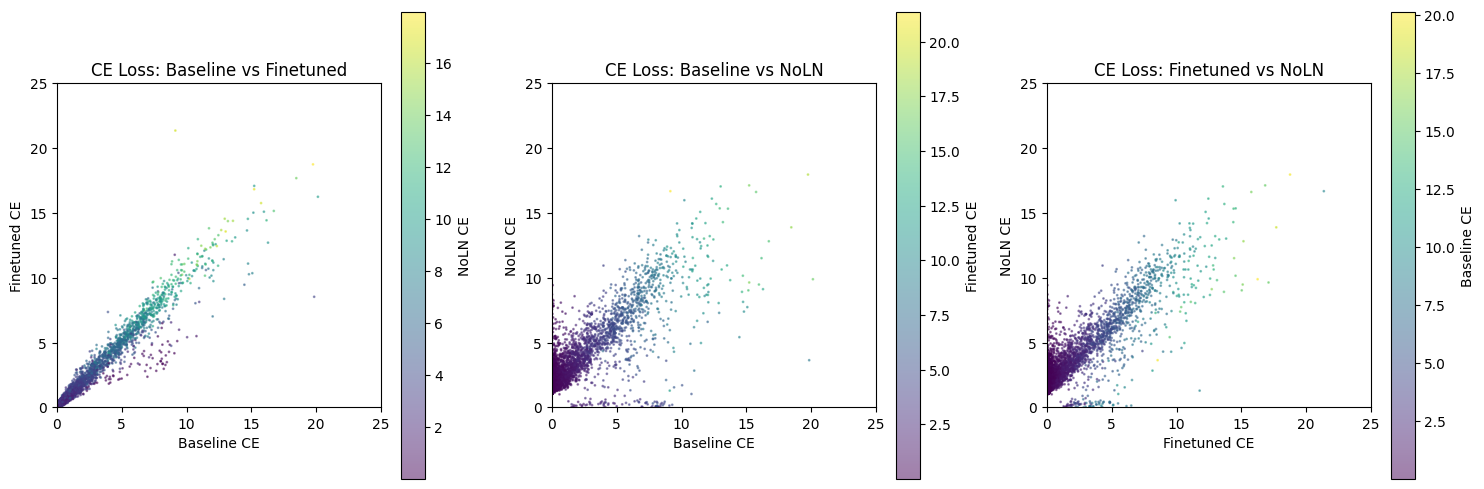

In [104]:
plot_ce_scatter_comparison(df_galvins_area, max_ce=25)


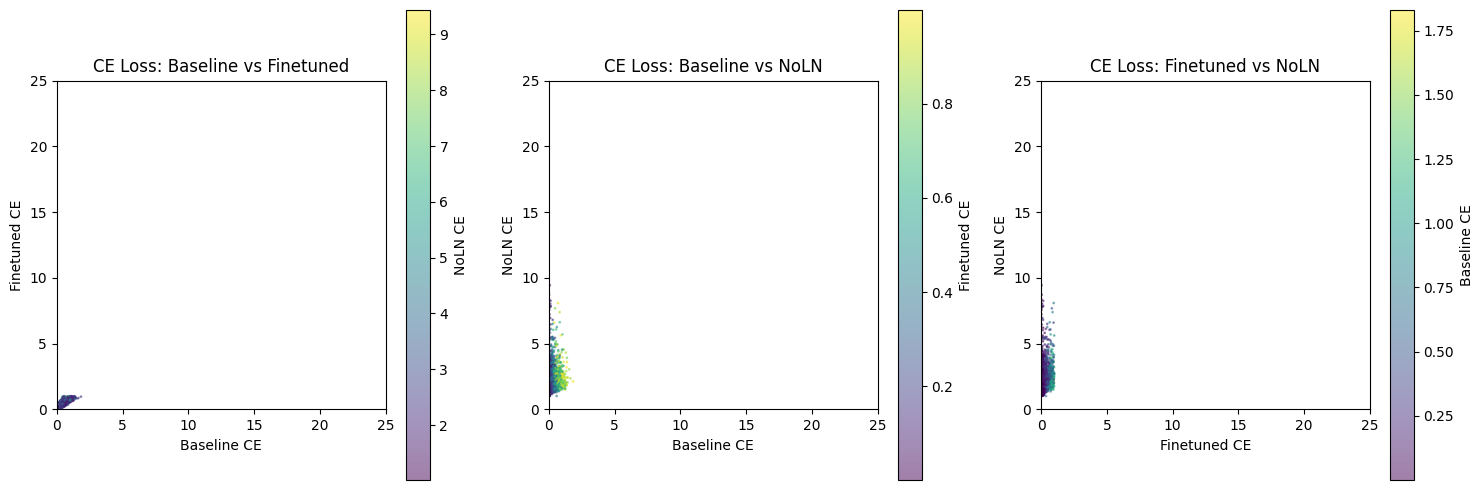

In [105]:
plot_ce_scatter_comparison(df_lucas_area, max_ce=25)


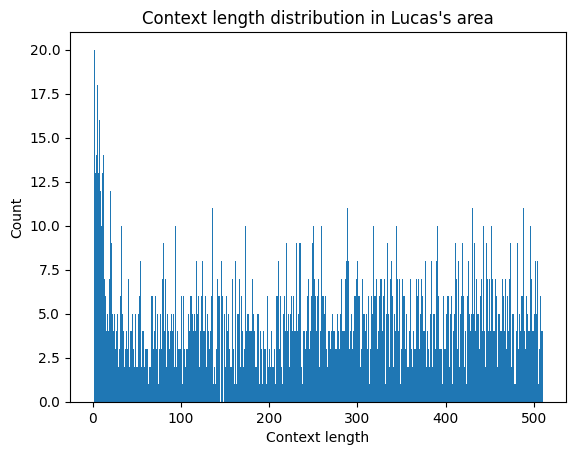

In [112]:
# plt.scatter(df_lucas_area['context_length'], df_lucas_area['ce_noLN'], s=1)
plt.hist(df_lucas_area['context_length'], bins=np.arange(0, 512, 1))
plt.title('Context length distribution in Lucas\'s area')
plt.xlabel('Context length')
plt.ylabel('Count')
plt.show()


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')
# df_lucas_top = df_lucas_area.sort_values(by='ce_noLN', ascending=False).
df_lucas_area['full_context_text'] = df_lucas_area['full_context'].apply(lambda x: tokenizer.decode(x))
df_lucas_area['following_token_text'] = df_lucas_area['following_token'].apply(lambda x: tokenizer.decode(x))

    

seq: 8297): at android.os.Looper.loop(Looper.java:144)
ERROR/WindowManager(8297): at android.app.ActivityThread.main(ActivityThread.java:4937)
ERROR/WindowManager(8297): at java.lang.reflect.Method.invokeNative(Native Method)
ERROR/WindowManager(8297): at java.lang.reflect.Method.invoke(Method.java:521)
ERROR/WindowManager(8297): at com.android.internal.os.ZygoteInit$MethodAndArgsCaller.run(ZygoteInit.java:868)
ERROR/WindowManager(8297): at com.android.internal.os.ZygoteInit.main(ZygoteInit.java:626)
ERROR/WindowManager(8297): at dalvik.system.NativeStart.main(Native Method)

But another error message is written to the log before the above one, which is:
ERROR/AndroidRuntime(8297): FATAL EXCEPTION: Thread-9
ERROR/AndroidRuntime(8297): java.lang.RuntimeException: Can't create handler inside thread that has not called Looper.prepare()
ERROR/AndroidRuntime(8297): at android.os.Handler.<init>(Handler.java:121)
ERROR/AndroidRuntime(8297): at android.widget.Toast.<init>(Toast.java:68)

next:

In [129]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')
df_lucas_top = df_lucas_area.sort_values(by='ce_noLN', ascending=True).head(5)
for _, row in df_lucas_top.iterrows():
    print('seq:', tokenizer.decode(row.full_context))
    print('next: ', tokenizer.decode(row.following_token))
    print('-'*100)


seq: 4)) - sqrt(5)))**2.
256*sqrt(5) + 1344
Simplify -1*sqrt(156)/(sqrt(48)/sqrt(4)*4)*1*-1 + 0.
sqrt(13)/4
Simplify -5*(0 + sqrt(1152) + -1) + 4.
-120*sqrt(2) + 9
Simplify 1 + (4*(4 + sqrt(14)/((sqrt(2) - sqrt(8))*-2)))**2.
64*sqrt(7) + 285
Simplify -1 + 1 + (sqrt(208) - (5 + (-2*sqrt(208) - sqrt(208)))**2) + -5.
-1902 + 124*sqrt(13)
Simplify ((-6*1*sqrt(2448) + 3*(sqrt(2448) + 0))*-2)**2.
88128
Simplify (3*(sqrt(684) + 4*sqrt(684)))**2 - ((sqrt(190)/sqrt(90))**2 - (sqrt(19) + ((-4*sqrt(304))**2 - sqrt(19)))).
1428857/9
Simplify (sqrt(16)/sqrt(800))**2 - ((sqrt(2) - (-4 + sqrt(2) + sqrt(2) + -1))**2 + sqrt(2) + -1).
-1299/50 + 9*sqrt(2)

next:  Sim
----------------------------------------------------------------------------------------------------
seq:  cards as you progress as a result of the story. And remember all that loot you’ve got been gathering? Stop by the reward keep to devote it on new cards and updates.
• Deep Approach — Monster Crew has an RPG at its main, with a broad-ra

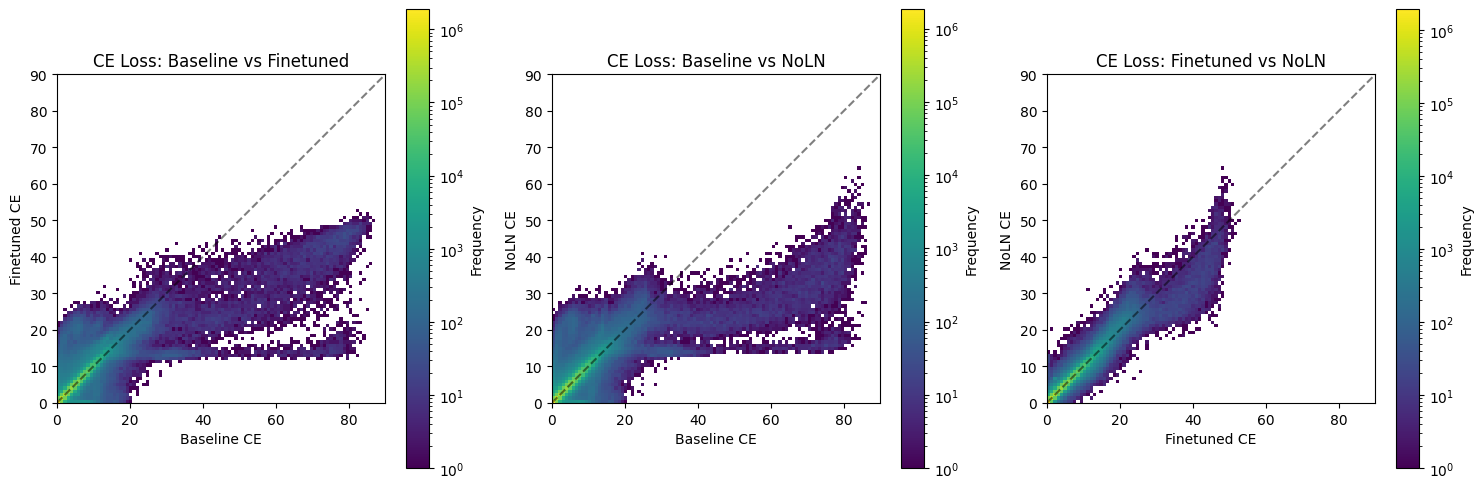

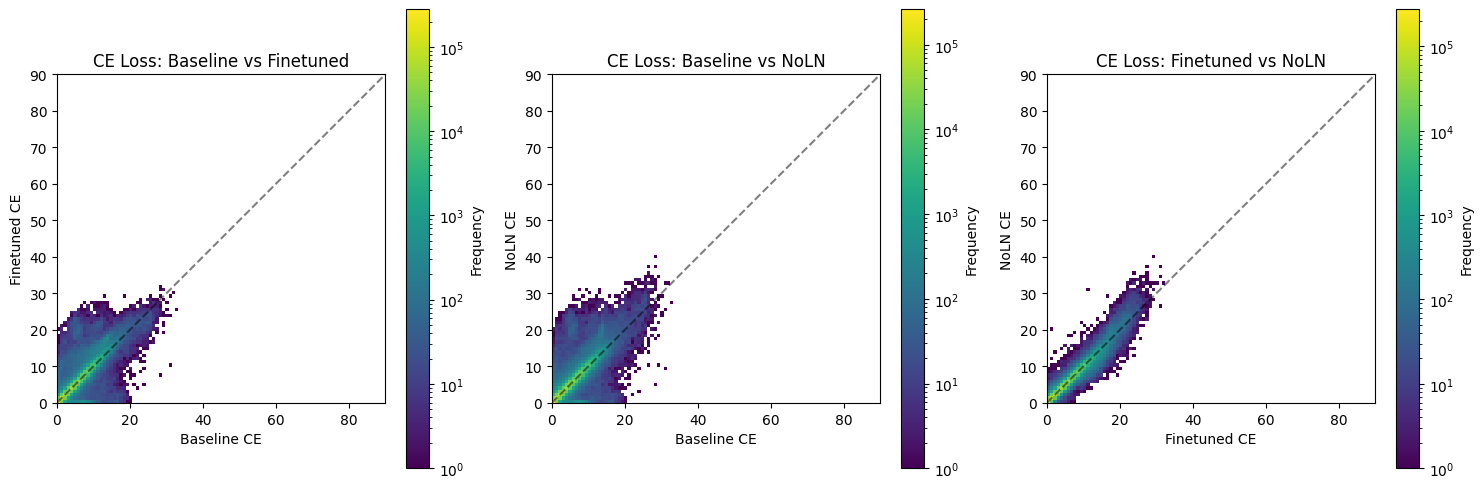

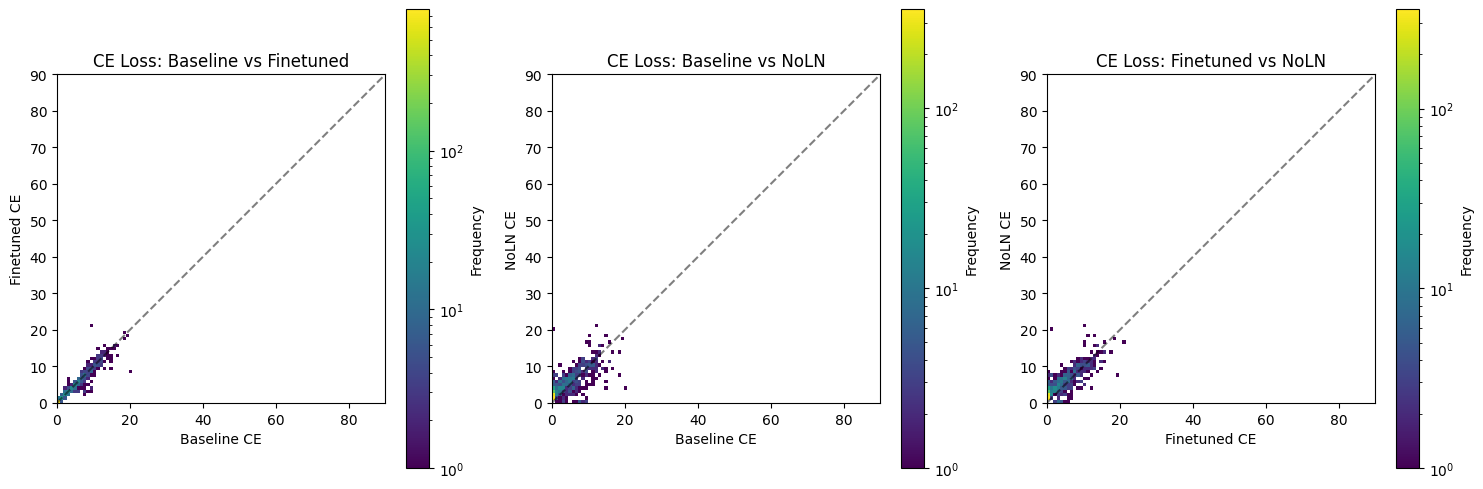

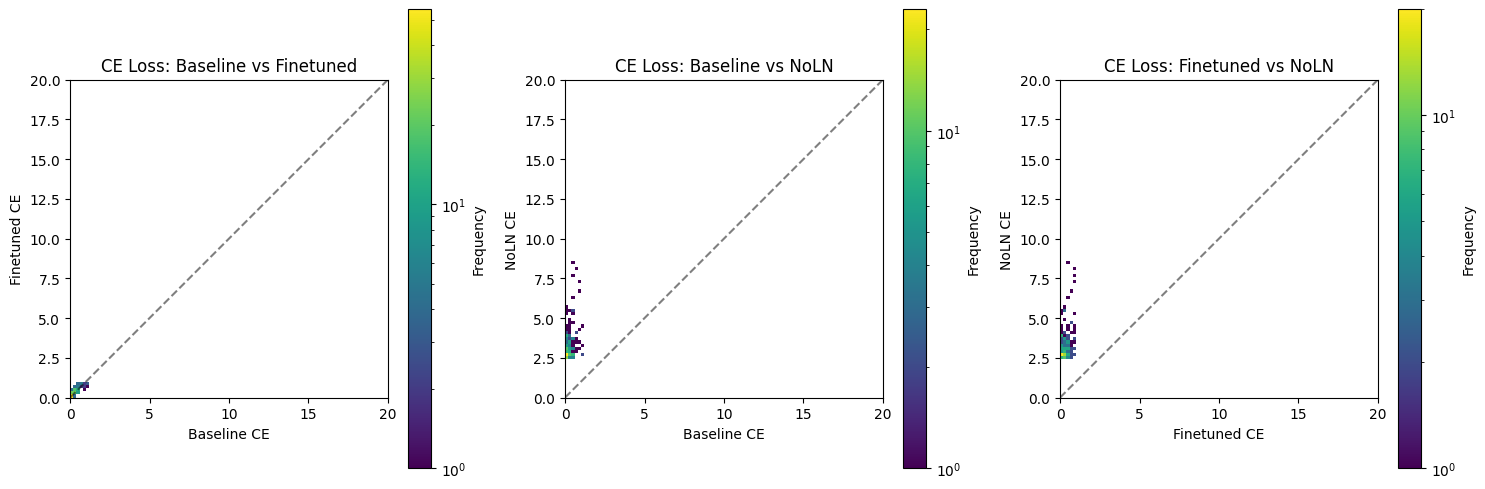

(<Figure size 1500x500 with 6 Axes>,
 (<Axes: title={'center': 'CE Loss: Baseline vs Finetuned'}, xlabel='Baseline CE', ylabel='Finetuned CE'>,
  <Axes: title={'center': 'CE Loss: Baseline vs NoLN'}, xlabel='Baseline CE', ylabel='NoLN CE'>,
  <Axes: title={'center': 'CE Loss: Finetuned vs NoLN'}, xlabel='Finetuned CE', ylabel='NoLN CE'>))

In [14]:
# Token IDs for special characters: [('\r', 201), ('\t', 197), ('\x0c', 200), ('\n', 198), ('\n\n', 628)
df_filtered = df[~df['following_token'].isin([201, 197, 200, 628])]
df_filtered = df_filtered[~df_filtered['last_token'].isin([628])]
df_filtered = df_filtered[(df_filtered['context_length'] >1) & (df_filtered['context_length'] < 100)]
df_filtered = df_filtered[df_filtered['input_sequence_id'] != 3784]
df_filtered = df_filtered[df_filtered['input_sequence_id'] != 6634]
df_filtered = df_filtered[df_filtered['input_sequence_id'] != 8859]
# galvin's area
df_LN_specific_diff = df_filtered[(df_filtered['jsd_baseline_vs_finetuned'] < 0.05) & (df_filtered['jsd_baseline_vs_noLN'] > 0.3)] 
# luca's area
df_superfiltered = df_LN_specific_diff[(df_LN_specific_diff['ce_finetuned'] < 1) & (df_LN_specific_diff['ce_noLN'] > 2.5)]
plot_ce_hist2d_comparison(df, max_ce=90)
plot_ce_hist2d_comparison(df_filtered, max_ce=90)
plot_ce_hist2d_comparison(df_LN_specific_diff, max_ce=90)
plot_ce_hist2d_comparison(df_superfiltered, max_ce=20)

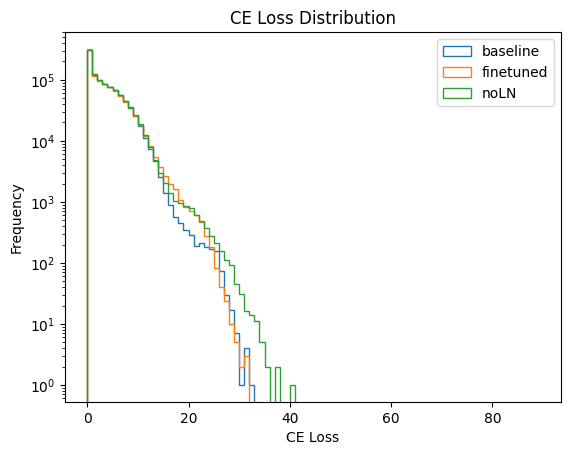

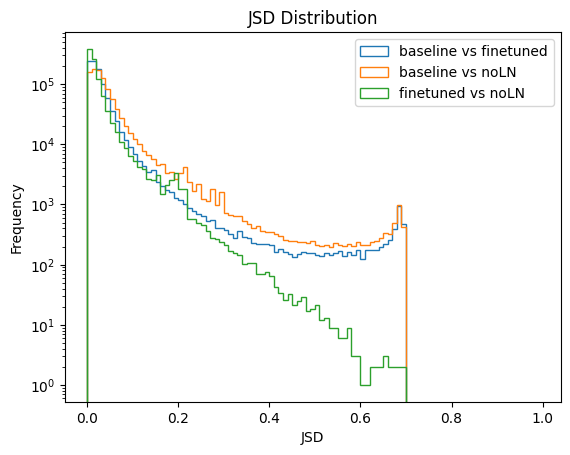

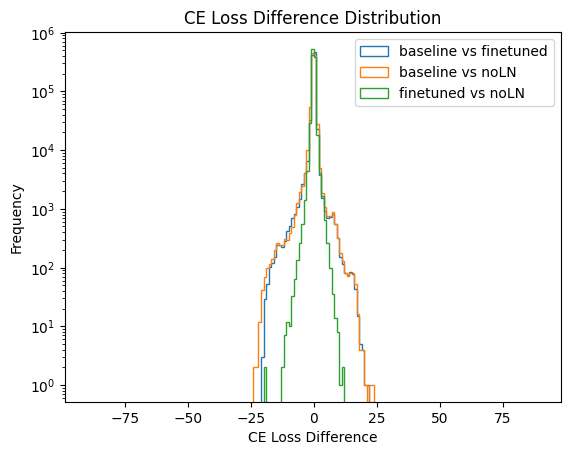

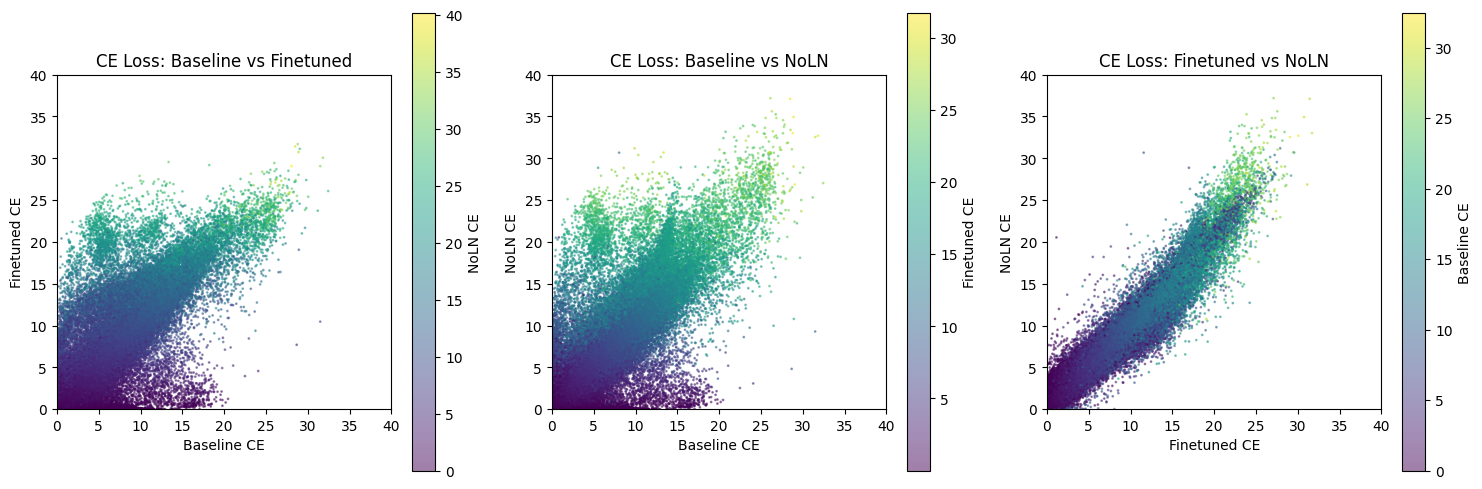

In [16]:
plot_ce_distribution(df_filtered)
plot_jsd_distribution(df_filtered)
plot_ce_diff_distribution(df_filtered)
plot_ce_scatter_comparison(df_filtered, max_ce=40)

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df_filtered['ce_baseline'], df_filtered['ce_finetuned'], c=df_filtered['ce_noLN'], cmap='viridis')
plt.show()

KeyboardInterrupt: 

In [5]:
plt

NameError: name 'plt' is not defined

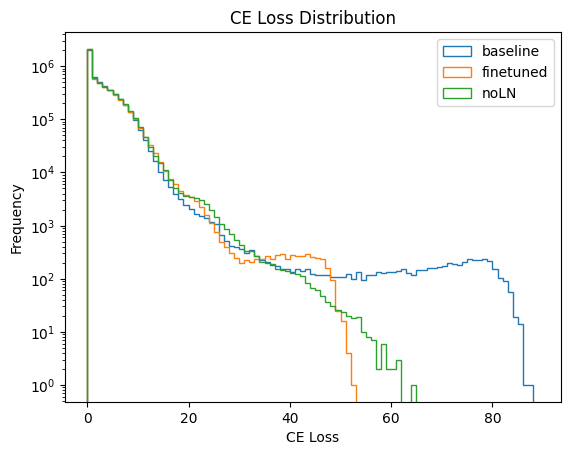

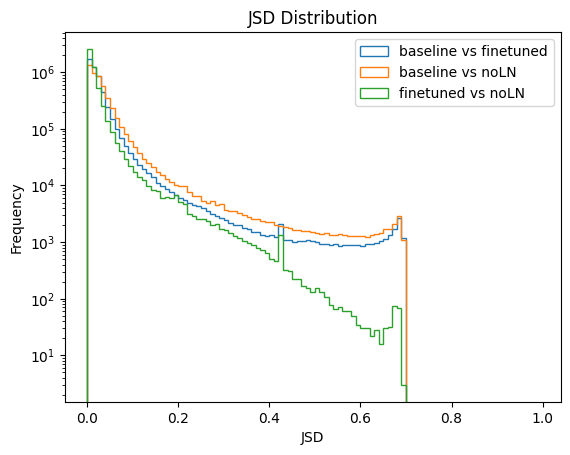

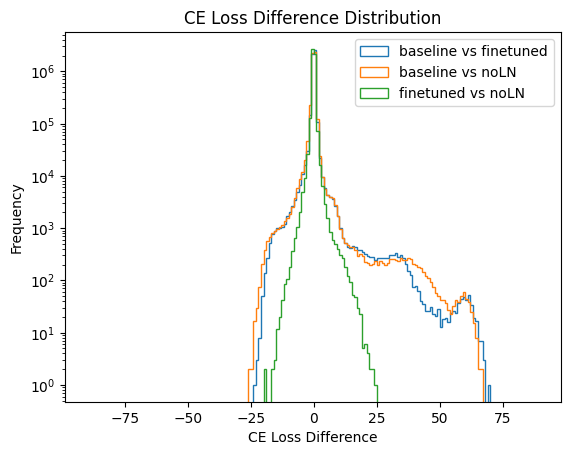

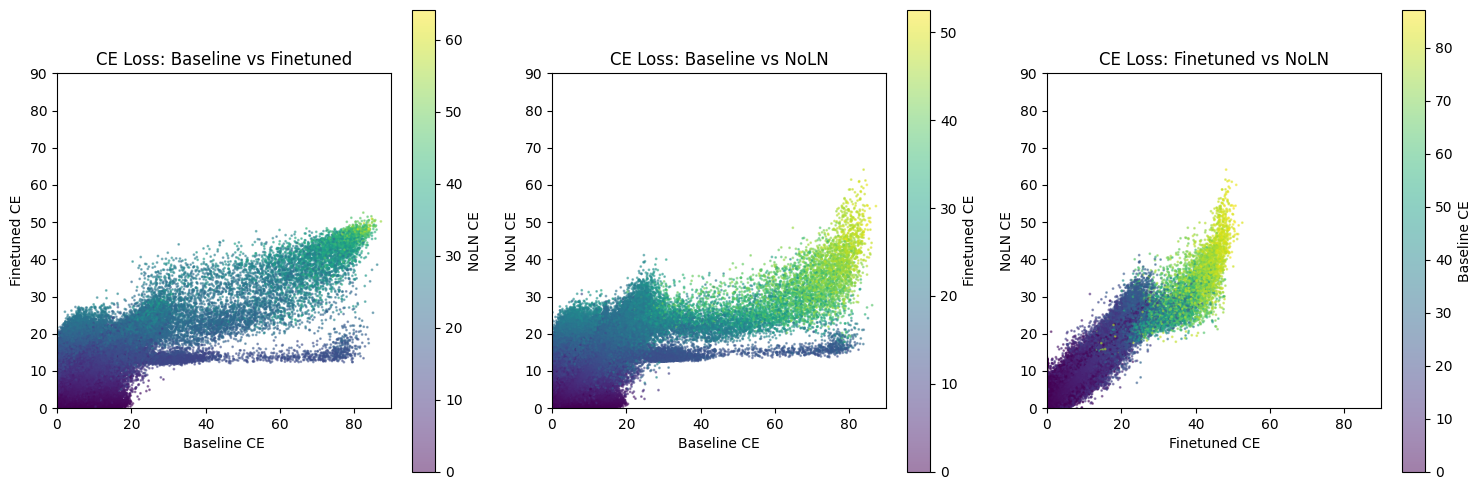

In [ ]:
plot_ce_distribution(df)
plot_jsd_distribution(df)
plot_ce_diff_distribution(df)
plot_ce_scatter_comparison(df, max_ce=90)

In [ ]:
plot_ce_distribution(df_filtered)

In [ ]:
plot_ce_distribution(df_filtered)

No kernel connected